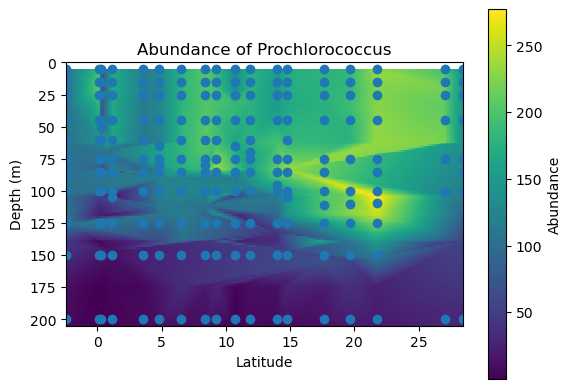

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata 

depth_file = pd.read_csv('Depthdata.csv')

plt.title('Abundance of Prochlorococcus')
plt.xlabel('Latitude')
plt.ylabel('Depth (m)')

plt.ylim(205, 0)

#x
pro_lat = depth_file['lat'].to_list()

#y
pro_depth = depth_file['depth'].to_list()

#z
pro_abun = depth_file['cell_abundance_prochloro'].to_list()

# number of samples to generate
numcols, numrows = 197, 197

# specify grid limits to color in data
# Creates array of x and y values
xi = np.linspace(min(pro_lat), max(pro_lat), numcols)
yi = np.linspace(min(pro_depth), max(pro_depth), numrows)

# Create 2-D rectangular grid from 1-D inputs (arrays)
xi, yi = np.meshgrid(xi, yi)

# grid of interpolated data
zi = griddata((pro_lat, pro_depth), pro_abun, (xi, yi), method = 'linear')

# zi = parameter of data; extent = bounding box of coordinates; aspect = affect graph size;
# interpolation = color box in relation to nearest box, origin = placing [0,0] on graph
abundance = plt.imshow(zi, extent=[min(pro_lat), max(pro_lat), min(pro_depth), max(pro_abun)], aspect=0.10, interpolation = 'nearest', origin = 'lower')

# create color bar
plt.colorbar(abundance, label = 'Abundance')

plt.scatter(pro_lat, pro_depth)

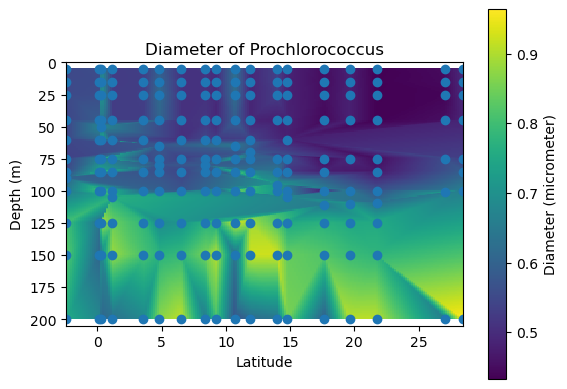

In [5]:
plt.title('Diameter of Prochlorococcus')
plt.xlabel('Latitude')
plt.ylabel('Depth (m)')

plt.ylim(205, 0)

# z for abundance
pro_diameter = depth_file['diameter_prochloro'].to_list()

# number of samples to generate
numcols, numrows = 197, 197

# grid of interpolated data
zi_abun = griddata((pro_lat, pro_depth), pro_diameter, (xi, yi), method = 'linear')

# zi = parameter of data; extent = bounding box of coordinates; aspect = affect graph size;
# interpolation = color box in relation to nearest box, origin = placing [0,0] on graph
abundance = plt.imshow(zi_abun, extent=[min(pro_lat), max(pro_lat), min(pro_depth), max(pro_depth)], aspect=0.10, interpolation = 'nearest', origin = 'lower')

# create color bar
plt.colorbar(abundance, label = 'Diameter (micrometer)')

plt.scatter(pro_lat, pro_depth)